In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
data_train = pd.read_csv('Train_bm.csv')
data_test = pd.read_csv('Test_bm.csv')

In [58]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [59]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


# Cleaning the train data

# Working with the Item_Weight column

In [60]:
data_train['Item_Weight'].isnull().sum()

1463

In [61]:
data_train['Item_Weight']=data_train['Item_Weight'].fillna((data_train['Item_Weight'].mean()))

In [62]:
data_train['Item_Weight'].isnull().sum()

0

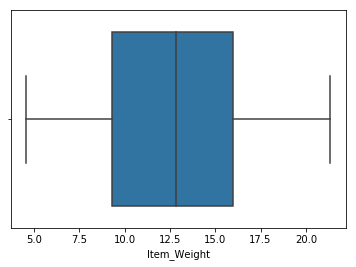

In [63]:
sns.boxplot(x='Item_Weight',data=data_train)

# Working with Item_Fat_Content column

In [64]:
data_train['Item_Fat_Content'].isnull().sum()

0

In [65]:
data_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [66]:
data_train['Item_Fat_Content']=data_train['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [67]:
data_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Working with Item_Visibility column

In [68]:
data_train['Item_Visibility'].isnull().sum()

0

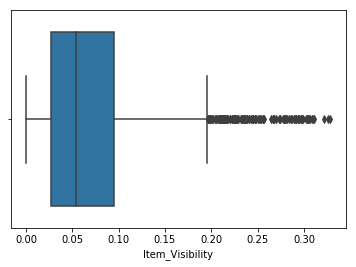

In [69]:
sns.boxplot(x='Item_Visibility',data=data_train)

In [70]:
data_train['Item_Visibility'].head()

0    0.016047
1    0.019278
2    0.016760
3    0.000000
4    0.000000
Name: Item_Visibility, dtype: float64

# Working with the Item_Type column

In [71]:
data_train['Item_Type'].isnull().sum()

0

In [72]:
data_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

# Working with the Item_MRP column

In [73]:
data_train['Item_MRP'].isnull().sum()

0

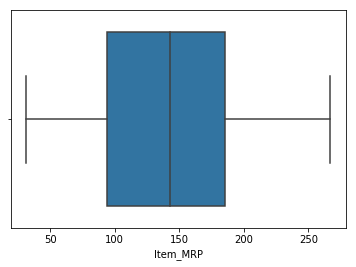

In [74]:
sns.boxplot(x='Item_MRP',data=data_train)

# Working with the Outlet_Identifier column

In [75]:
data_train['Outlet_Identifier'].isnull().sum()

0

In [76]:
data_train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

# Working with the Outlet_Establishment_Year column

In [77]:
data_train['Outlet_Establishment_Year'].isnull().sum()

0

# Working with the Outlet_Size column

In [78]:
data_train['Outlet_Size'].isnull().sum()

2410

In [79]:
data_train['Outlet_Size']=data_train['Outlet_Size'].fillna((data_train['Outlet_Size'].mode()[0]))

In [80]:
data_train['Outlet_Size'].isnull().sum()

0

In [81]:
data_train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

# Working with the Outlet_Location_Type column

In [82]:
data_train['Outlet_Location_Type'].isnull().sum()

0

In [83]:
data_train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

# Working with Outlet_Type column

In [84]:
data_train['Outlet_Type'].isnull().sum()

0

In [85]:
data_train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

# Working with the Item_Outlet_Sales column

In [86]:
data_train['Item_Outlet_Sales'].isnull().sum()

0

# Working with the item identifier column

In [87]:
data_train['Item_Identifier'].head()

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [88]:
data_train['Item_Identifier']=data_train['Item_Identifier'].apply(lambda x:x[0:2]) # splits the first two characters
data_train['Item_Identifier']=data_train['Item_Identifier'].replace({'FD':'food','NC':'non-consumable','DR':'drinks'})


In [89]:
data_train['Item_Identifier'].value_counts()

food              6125
non-consumable    1599
drinks             799
Name: Item_Identifier, dtype: int64

# Exploratory Data Analysis

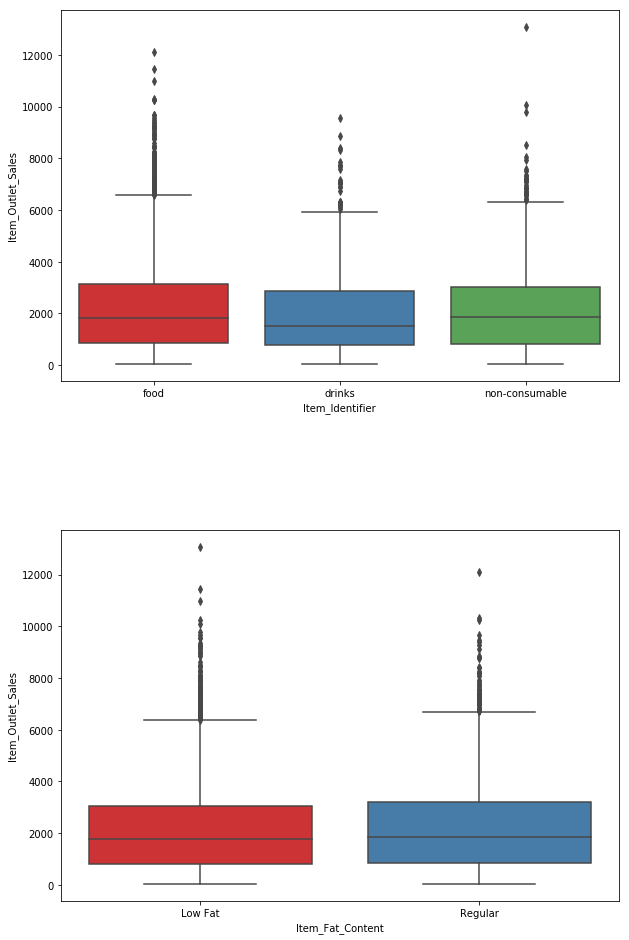

In [90]:
plt.figure(figsize = (10,9))

plt.subplot(211)
sns.boxplot(x ='Item_Identifier', y='Item_Outlet_Sales', data=data_train, palette="Set1")

plt.subplot(212)
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=data_train, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

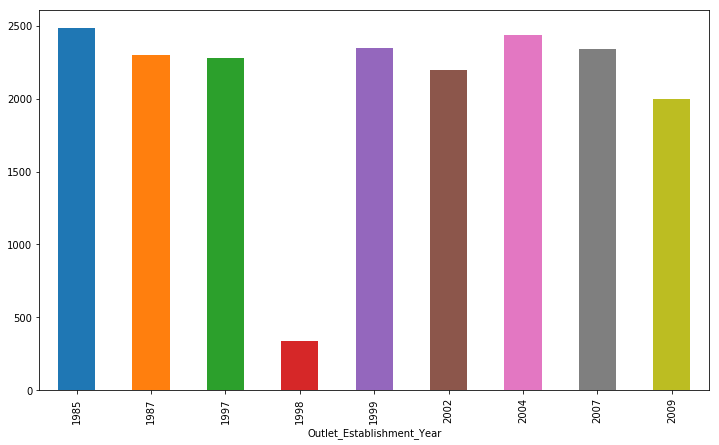

In [105]:
plt.figure(figsize=(12,7))
data_train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

# Building the model

In [91]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,food,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,drinks,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,food,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,food,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,non-consumable,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [92]:
data_train = pd.get_dummies(data_train, columns = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'], drop_first = True)


In [93]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 39 columns):
Item_Weight                        8523 non-null float64
Item_Visibility                    8523 non-null float64
Item_MRP                           8523 non-null float64
Outlet_Establishment_Year          8523 non-null int64
Item_Outlet_Sales                  8523 non-null float64
Item_Identifier_food               8523 non-null uint8
Item_Identifier_non-consumable     8523 non-null uint8
Item_Fat_Content_Regular           8523 non-null uint8
Item_Type_Breads                   8523 non-null uint8
Item_Type_Breakfast                8523 non-null uint8
Item_Type_Canned                   8523 non-null uint8
Item_Type_Dairy                    8523 non-null uint8
Item_Type_Frozen Foods             8523 non-null uint8
Item_Type_Fruits and Vegetables    8523 non-null uint8
Item_Type_Hard Drinks              8523 non-null uint8
Item_Type_Health and Hygiene       8523 non-null uint8
Item_

In [94]:
y = data_train['Item_Outlet_Sales']
x= data_train.drop('Outlet_Establishment_Year',axis=1).values
x= data_train.drop('Item_Outlet_Sales',axis=1).values



In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state=101)

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [98]:
predictions = lm.predict(x_test)

In [99]:
predictions = pd.DataFrame(predictions)

In [100]:
predictions.head()

,0
0,1327.820760
1,2432.592460
2,1392.742502
3,851.677378
4,2433.663846


Text(0, 0.5, 'Predicted Y')

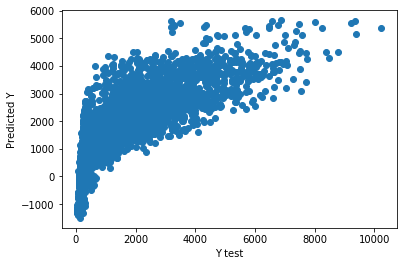

In [101]:
plt.scatter(y_test,predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

In [102]:
from sklearn import metrics

In [103]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))                  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 809.8309117277519
MSE: 1161038.2945252303
RMSE: 1077.5148697466918
